In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("fivethirtyeight")
import warnings
warnings.filterwarnings("ignore")

In [4]:
from tensorflow.keras import datasets

In [5]:
cifar=datasets.cifar10
(train_images,train_labels),(test_images,test_labels)=cifar.load_data()
class_name = [['airplane'],['car'],['bird'],['cat'],['deer'],['dog'],['frog'],['horse']
              ,['ship'],['truck']]
class_name=np.array(class_name)
class_name.reshape(10,1)

array([['airplane'],
       ['car'],
       ['bird'],
       ['cat'],
       ['deer'],
       ['dog'],
       ['frog'],
       ['horse'],
       ['ship'],
       ['truck']], dtype='<U8')

In [6]:
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)


Text(0.5, 0, "[['car']]")

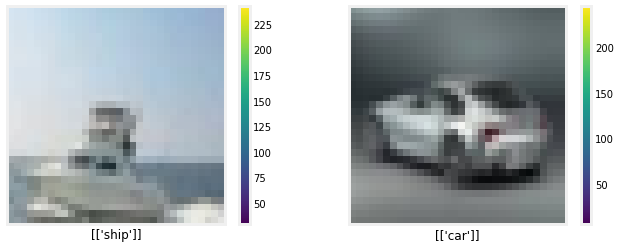

In [7]:
i=100
j=250
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(train_images[i])
plt.colorbar()
plt.grid(False)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.xlabel(class_name[train_labels[i]])
plt.subplot(1,2,2)
plt.imshow(train_images[j])
plt.colorbar()
plt.grid(False)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.xlabel(class_name[train_labels[j]])

In [8]:
train_images=train_images/255
test_images=test_images/255

Text(0.5, 0, "[['dog']]")

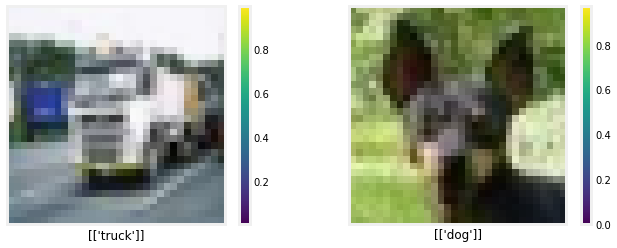

In [9]:
i=1000
j=2500
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(train_images[i])
plt.colorbar()
plt.grid(False)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.xlabel(class_name[train_labels[i]])
plt.subplot(1,2,2)
plt.imshow(train_images[j])
plt.colorbar()
plt.grid(False)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.xlabel(class_name[train_labels[j]])

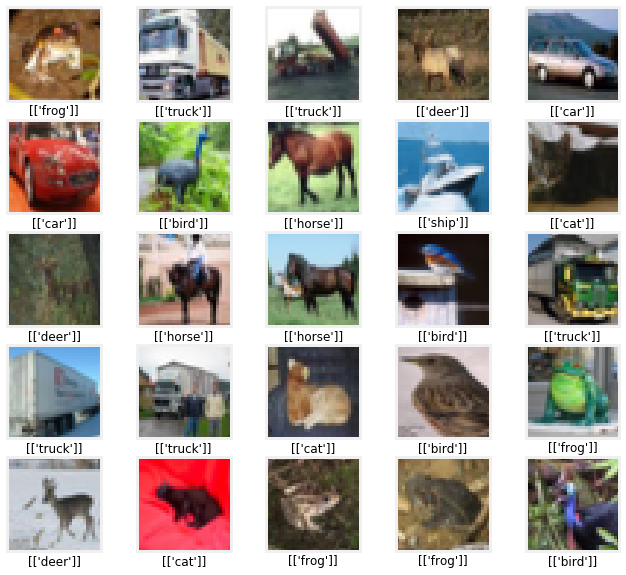

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    plt.imshow(train_images[i])
    plt.xlabel(class_name[train_labels[i]])
plt.show()

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
train_labels1=to_categorical(train_labels)
test_labels1=to_categorical(test_labels)

In [13]:
train_labels1.shape

(50000, 10)

In [16]:
train_images=train_images.reshape(50000,32,32,3)
test_images=test_images.reshape(10000,32,32,3)

In [17]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
def createmodel(optimizer="adam",loss="categorical_crossentropy"):
    model=Sequential()
    model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(256,activation="relu"))
    model.add(Dense(10,activation="softmax"))
    model.compile(optimizer=optimizer,loss=loss,metrics=["accuracy"])
    return model
model=createmodel()

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [20]:
callbacks=EarlyStopping(monitor="val_loss",mode="min",patience=5)

In [21]:
model.fit(x=train_images,y=train_labels1,
         validation_data=(test_images,test_labels1),
         epochs=20,callbacks=[callbacks])

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 49s 982us/sample - loss: 1.4971 - accuracy: 0.4581 - val_loss: 1.2744 - val_accuracy: 0.5409
Epoch 2/20
50000/50000 [==============================] - 51s 1ms/sample - loss: 1.1798 - accuracy: 0.5820 - val_loss: 1.1411 - val_accuracy: 0.5877
Epoch 3/20
50000/50000 [==============================] - 49s 971us/sample - loss: 1.0263 - accuracy: 0.6411 - val_loss: 1.0626 - val_accuracy: 0.6259
Epoch 4/20
50000/50000 [==============================] - 46s 915us/sample - loss: 0.9116 - accuracy: 0.6803 - val_loss: 1.0018 - val_accuracy: 0.6546
Epoch 5/20
50000/50000 [==============================] - 48s 963us/sample - loss: 0.8244 - accuracy: 0.7130 - val_loss: 1.0422 - val_accuracy: 0.6459
Epoch 6/20
50000/50000 [==============================] - 48s 950us/sample - loss: 0.7442 - accuracy: 0.7386 - val_loss: 0.9895 - val_accuracy: 0.6642
Epoch 7/20
50000/50000 [======================

In [22]:
loss=pd.DataFrame(model.history.history)
loss.tail()

,loss,accuracy,val_loss,val_accuracy
7,0.612681,0.78330,1.021935,0.6739
8,0.542167,0.80956,1.017426,0.6762
9,0.487216,0.83030,1.076822,0.6740
10,0.436999,0.84382,1.163360,0.6732
11,0.388285,0.86152,1.234185,0.6688


<Figure size 720x432 with 0 Axes>

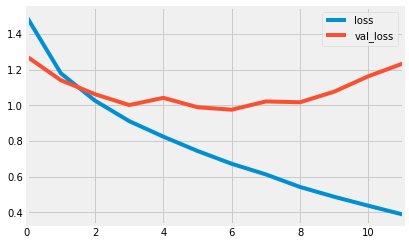

In [23]:
plt.figure(figsize=(10,6))
loss[["loss","val_loss"]].plot()

<Figure size 720x432 with 0 Axes>

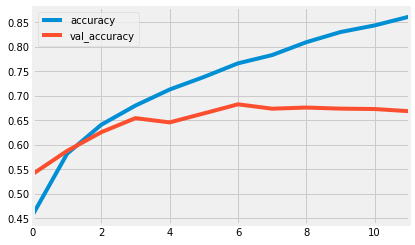

In [24]:
plt.figure(figsize=(10,6))
loss[["accuracy","val_accuracy"]].plot()

In [25]:
y_pred=model.predict_classes(test_images)

In [26]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
# analysing the results
print(confusion_matrix(test_labels,y_pred))
print(classification_report(test_labels,y_pred))
print(accuracy_score(test_labels,y_pred))

[[731  15  63  23  24   9  11  21  80  23]
 [ 41 771  14  15   5   9  10   6  58  71]
 [ 73  10 585  63  70 102  51  21  18   7]
 [ 23  16  98 489  76 170  56  42  13  17]
 [ 17   3 101  77 608  64  37  74  14   5]
 [ 20   5  69 200  46 567  25  50  11   7]
 [  9  14  72  54  40  37 750  10   9   5]
 [ 25   6  53  44  68  79   9 691   3  22]
 [ 68  22  27  18   9  14   5   7 799  31]
 [ 54 102  29  13  14  20   7  18  46 697]]
              precision    recall  f1-score   support

           0       0.69      0.73      0.71      1000
           1       0.80      0.77      0.79      1000
           2       0.53      0.58      0.55      1000
           3       0.49      0.49      0.49      1000
           4       0.63      0.61      0.62      1000
           5       0.53      0.57      0.55      1000
           6       0.78      0.75      0.76      1000
           7       0.74      0.69      0.71      1000
           8       0.76      0.80      0.78      1000
           9       0.79     

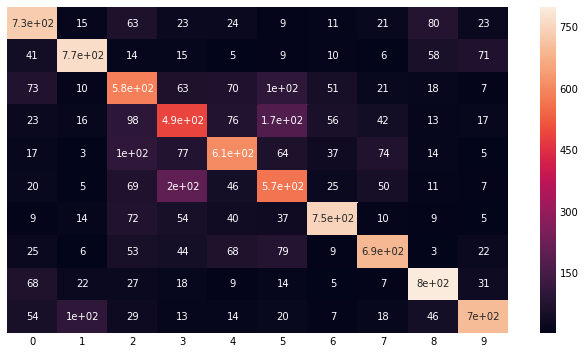

In [27]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(test_labels,y_pred),annot=True,yticklabels=False)

In [28]:
from tensorflow.keras.models import model_from_json

In [29]:
model_json=model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")

In [30]:
json_file=open("model.json","r")
loaded_model_json=json_file.read()
json_file.close()
loaded_model=model_from_json(loaded_model_json)
loaded_model.load_weights("model.h5")

In [31]:
loaded_model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [32]:
scores=loaded_model.evaluate(test_images,test_labels1)
print(loaded_model.metrics_names[1],scores[1]*100)

10000/10000 [==============================] - 3s 287us/sample - loss: 1.2342 - accuracy: 0.6688
accuracy 66.87999963760376


In [112]:
y_pred=model.predict_classes(test_images)
y=test_labels
y_pred_prob=model.predict_proba(test_images)
y=np.array(y).reshape(10000,)

In [113]:
correct_predictions=[]
for i in range(10000):
    if(y[i]==y_pred[i]):
        correct_predictions.append(i)
print(correct_predictions[0:10])
cp=correct_predictions[0:100]

[1, 2, 3, 5, 7, 8, 9, 10, 11, 13]


In [124]:
print(y.shape)
print(y_pred.shape)
print(test_labels.shape)

(10000,)
(10000,)
(10000, 1)


In [114]:
wrong_predictions=[]
for i in range(10000):
    if(y[i]!=y_pred[i]):
        wrong_predictions.append(i)
print(wrong_predictions[0:10])
wp=wrong_predictions[0:100]

[0, 4, 6, 12, 21, 24, 32, 33, 35, 36]


In [115]:
def plottingphoto(number):
    yp=y_pred[number]
    yo=y[number]
    if yp==yo:
        color="blue"
    else:
        color="red"
    plt.imshow(test_images[number])
    plt.grid(False)
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    plt.xlabel(str(class_name[yp])+" "+str(round(np.max(y_pred_prob[number:number+1,:])*100,2))+" %",color=color)

In [116]:
def plottingbargraph(number):
    yp=y_pred[number]
    yo=y[number]
    barplot=plt.bar(range(10),y_pred_prob[number],color="black")
    if yp==yo:
        barplot[yp].set_color("blue")
    else:
        barplot[yp].set_color("red")

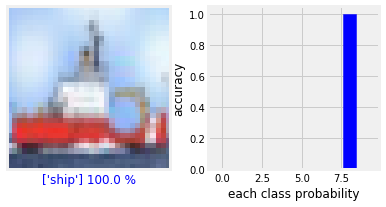

In [117]:
i=92
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plottingphoto(i)
plt.subplot(1,2,2)
plottingbargraph(i)
plt.ylabel("accuracy")
plt.xlabel("each class probability")
plt.show()

In [118]:
print("Total correct predictions "+ str(len(correct_predictions)))

Total correct predictions 6688


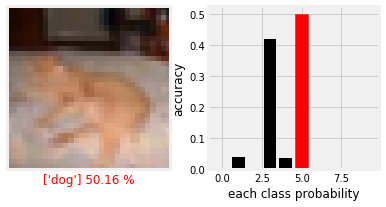

In [121]:
i=4589
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plottingphoto(i)
plt.subplot(1,2,2)
plottingbargraph(i)
plt.ylabel("accuracy")
plt.xlabel("each class probability")
plt.show()

In [122]:
print("Total wrong predictions "+ str(len(wrong_predictions)))

Total wrong predictions 3312


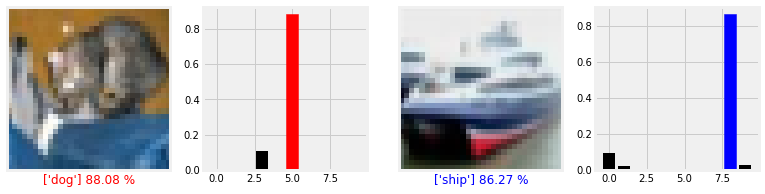

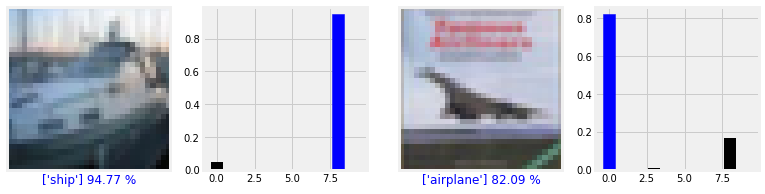

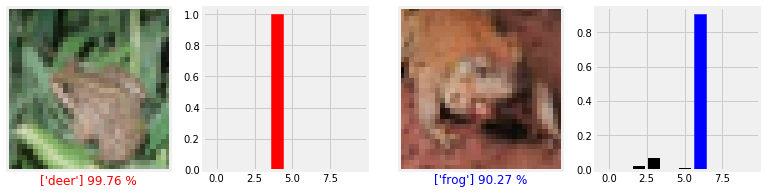

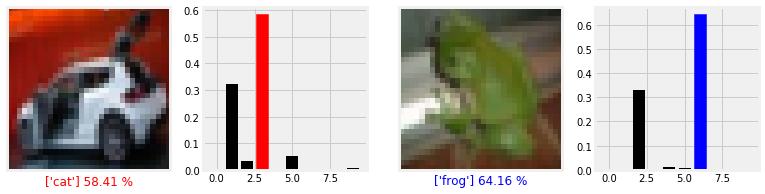

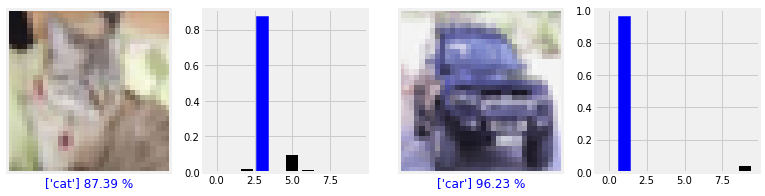

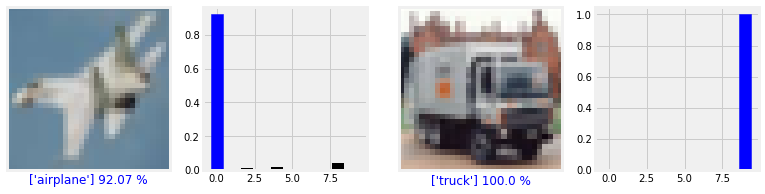

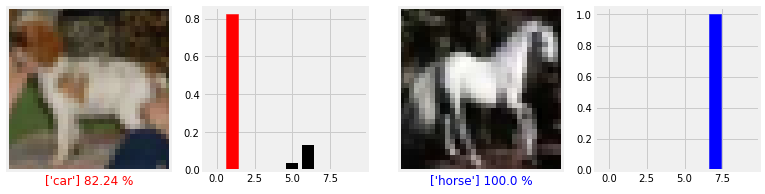

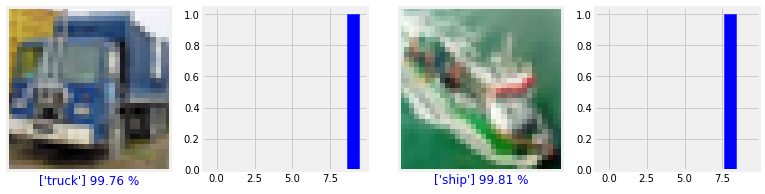

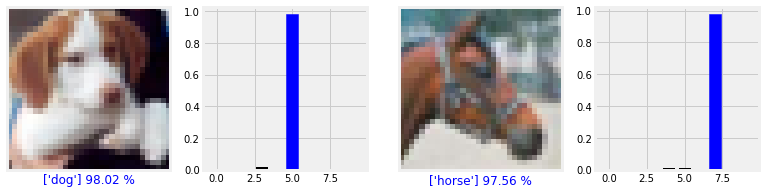

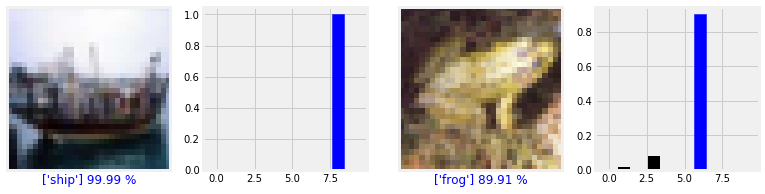

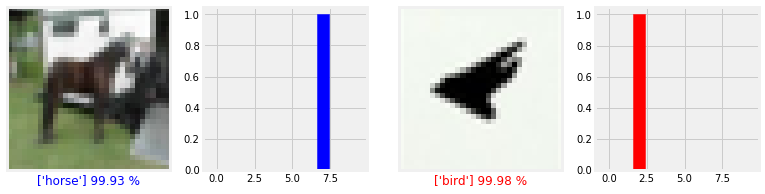

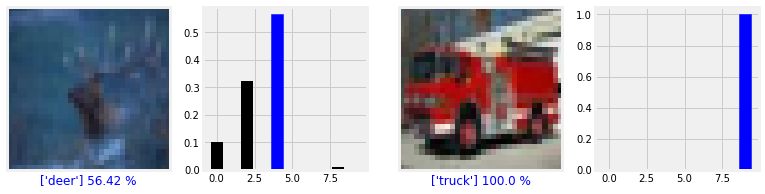

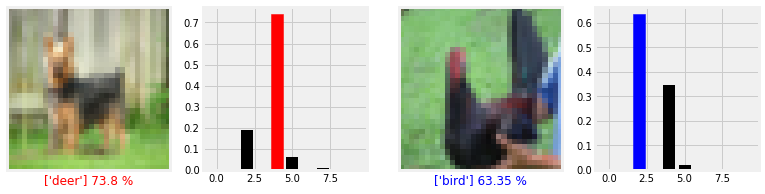

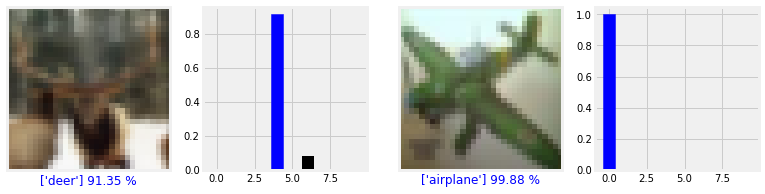

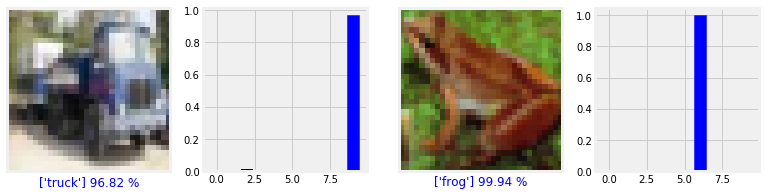

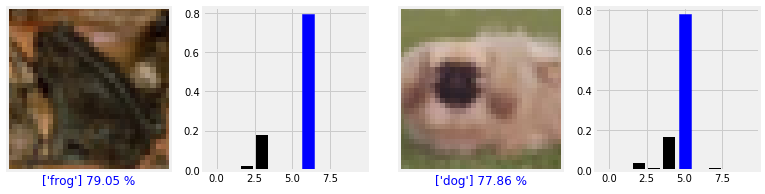

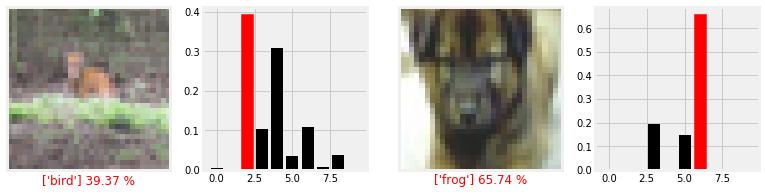

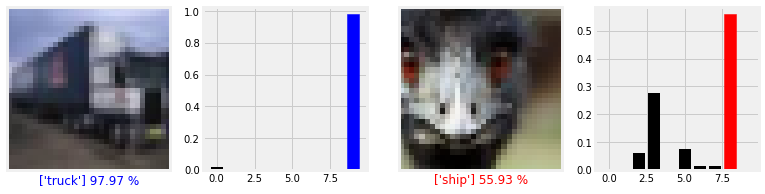

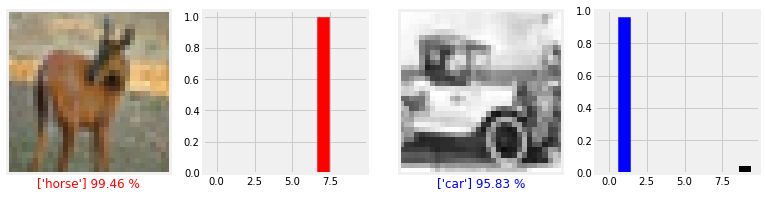

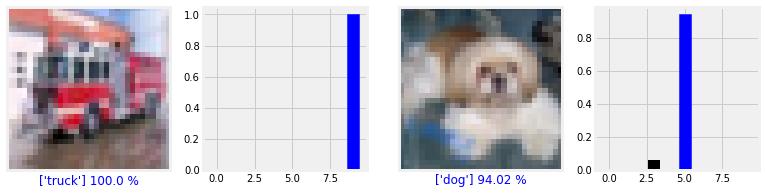

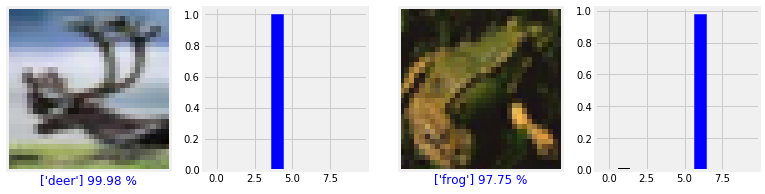

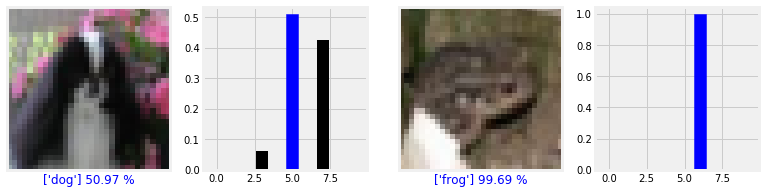

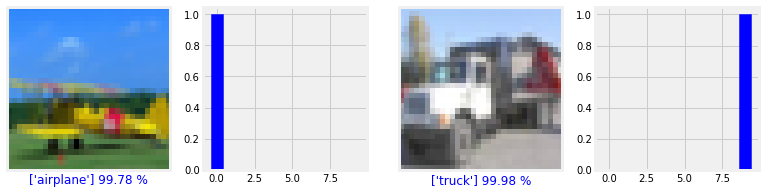

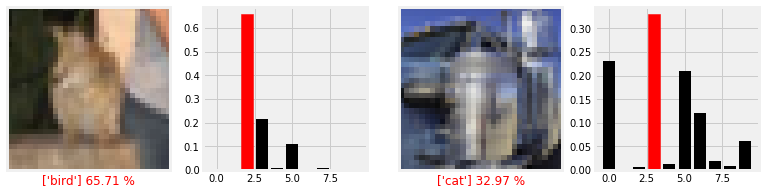

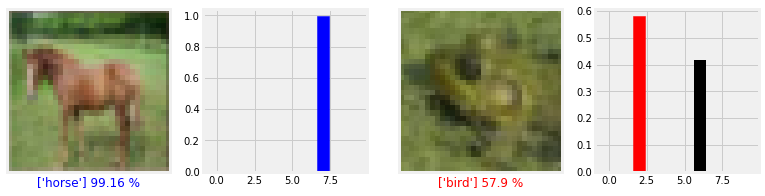

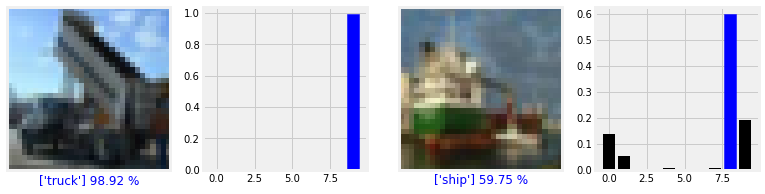

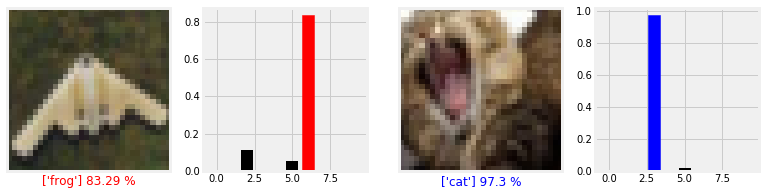

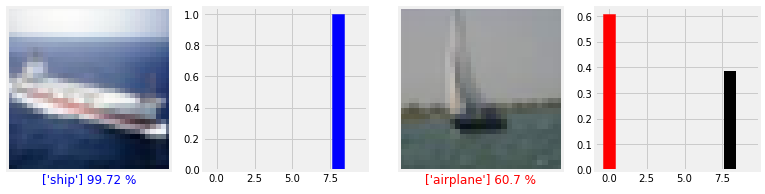

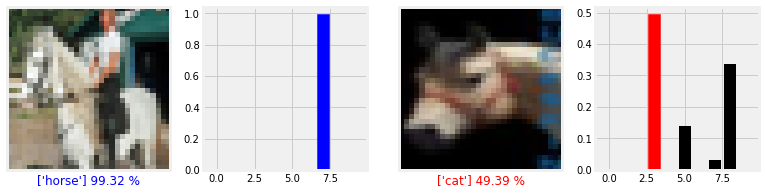

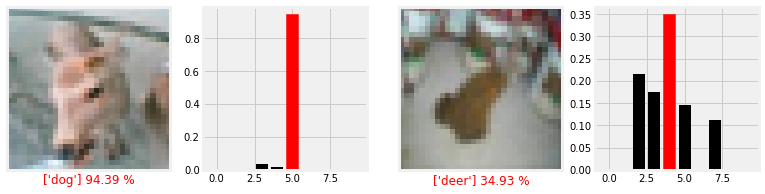

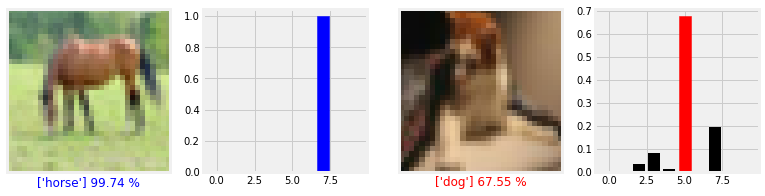

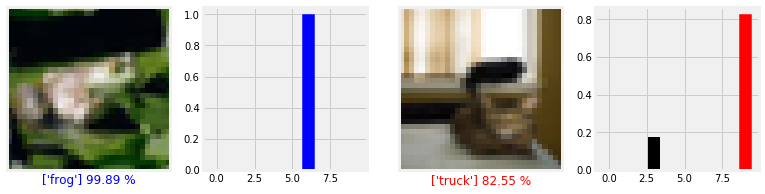

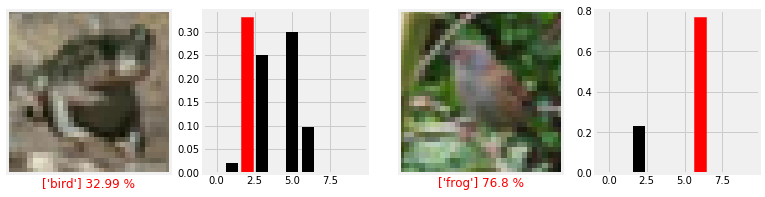

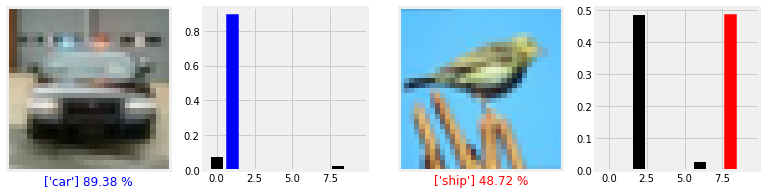

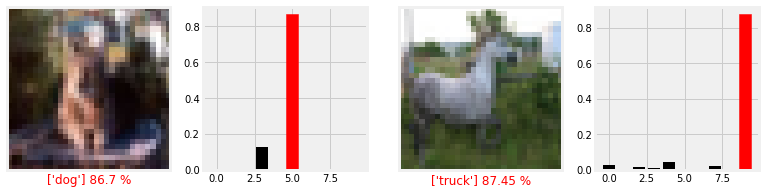

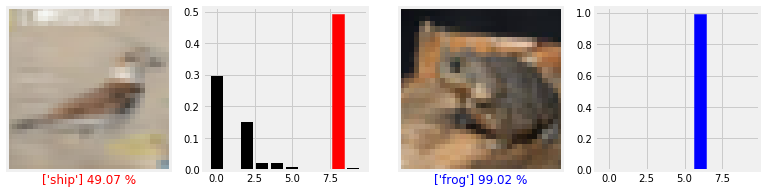

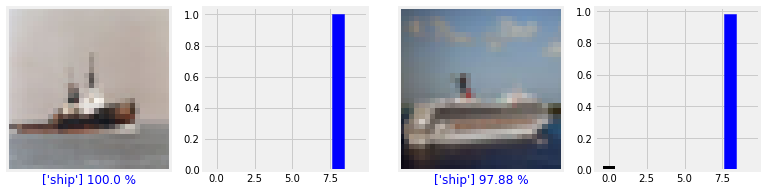

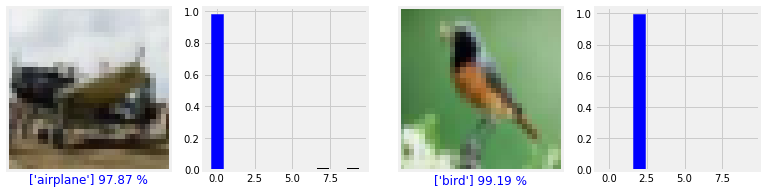

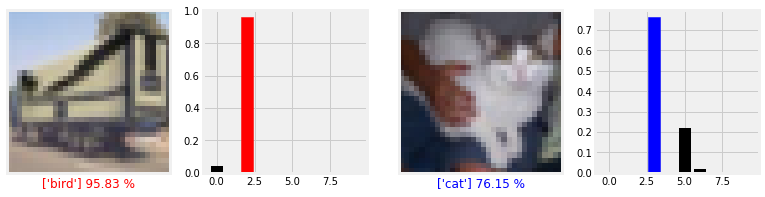

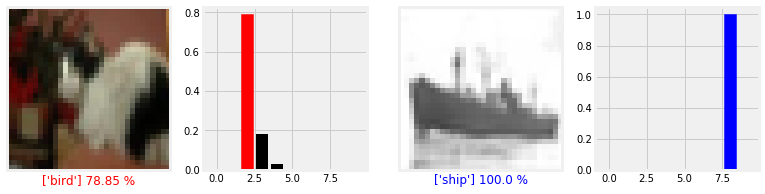

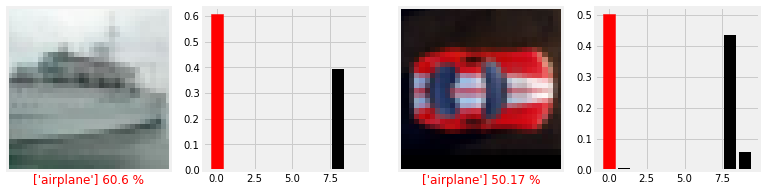

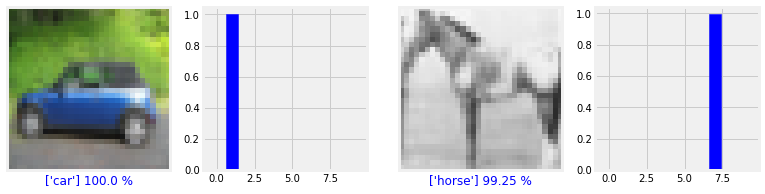

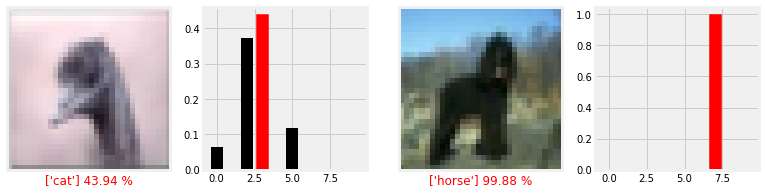

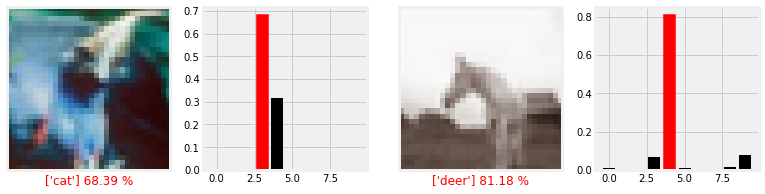

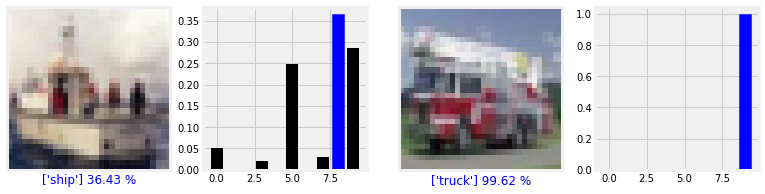

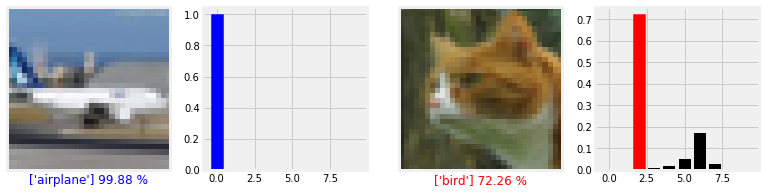

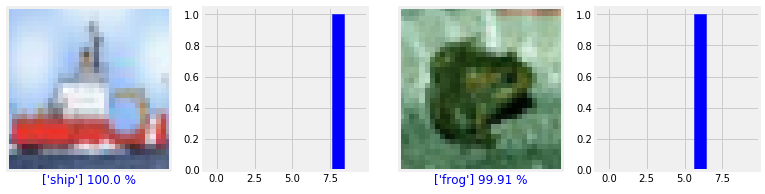

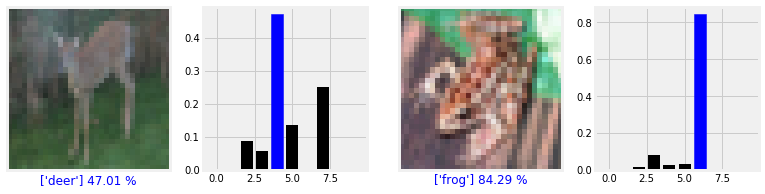

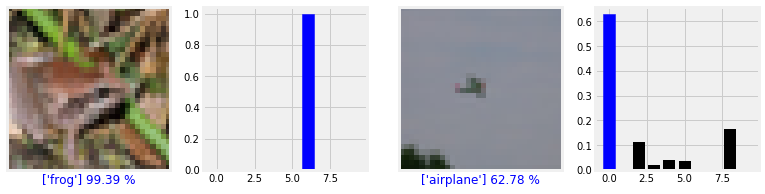

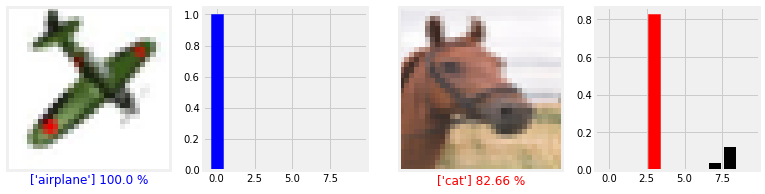

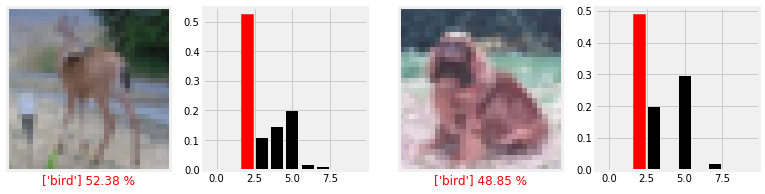

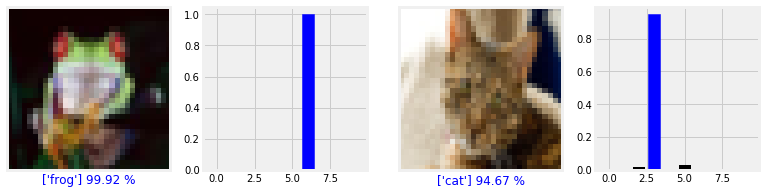

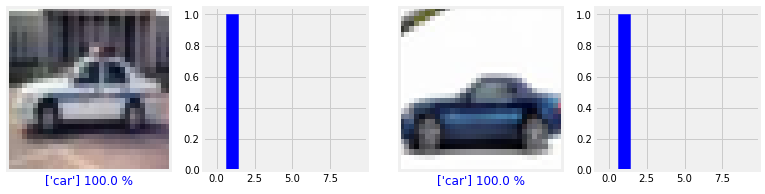

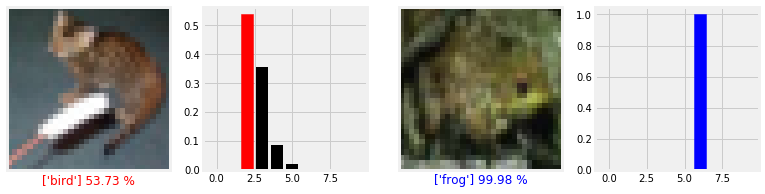

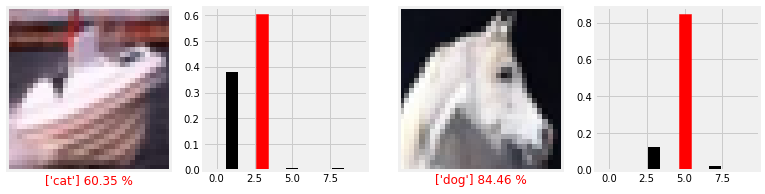

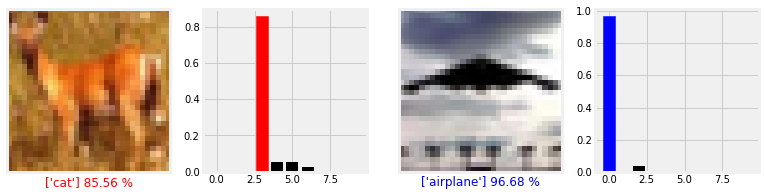

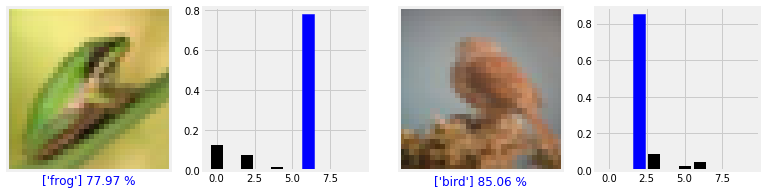

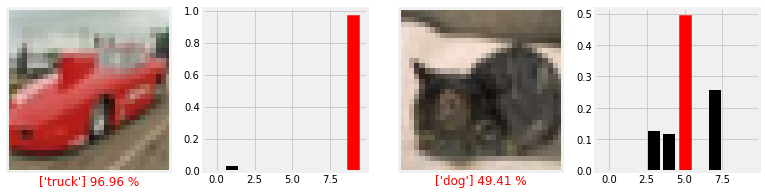

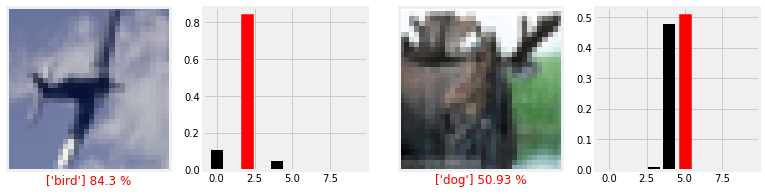

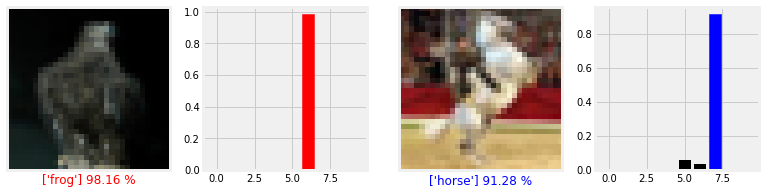

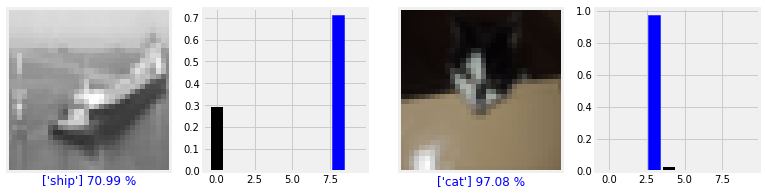

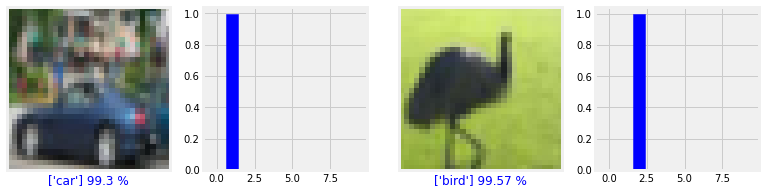

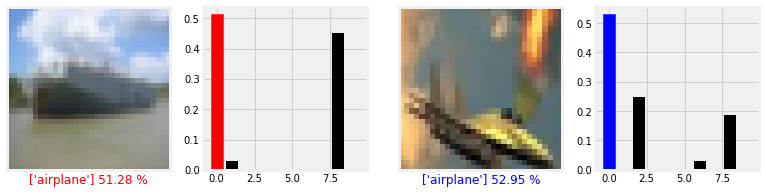

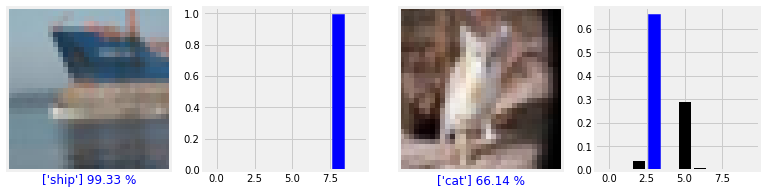

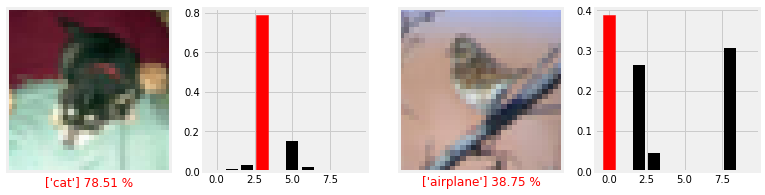

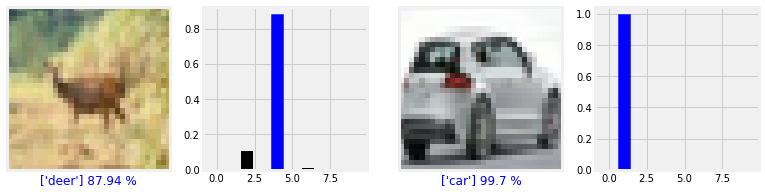

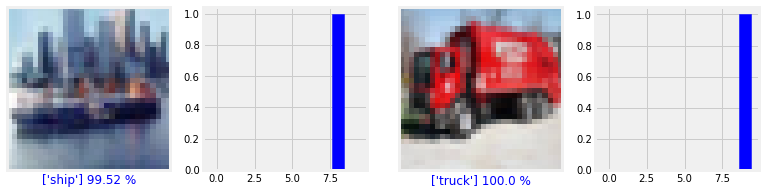

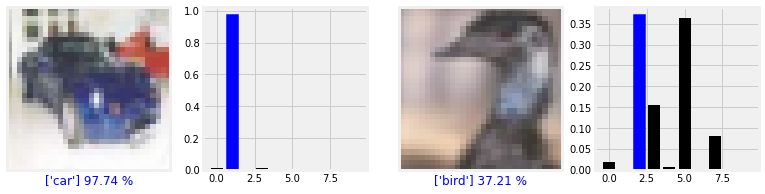

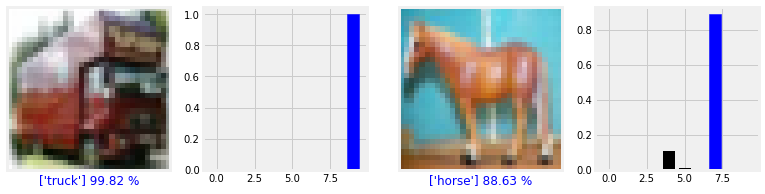

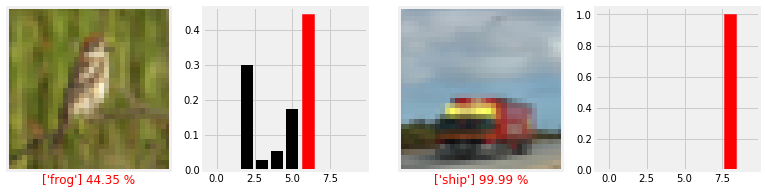

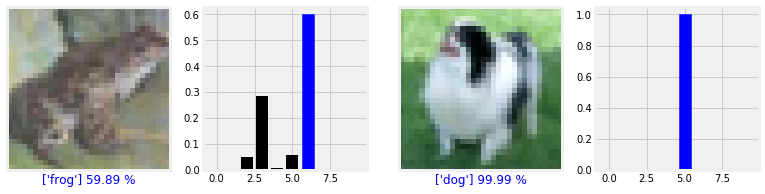

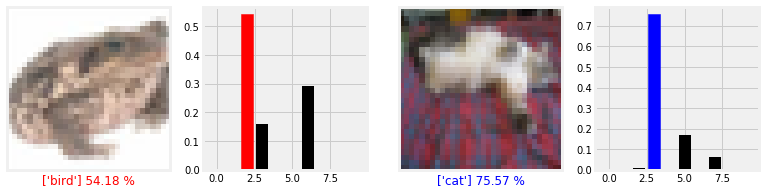

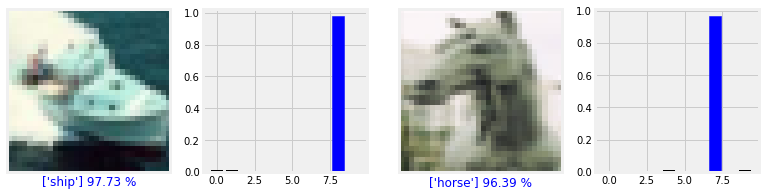

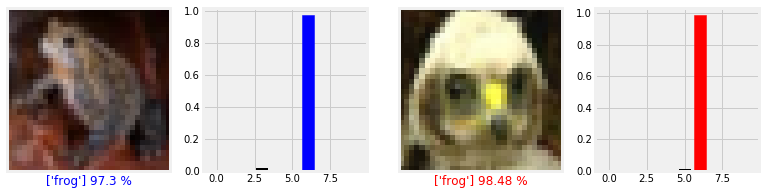

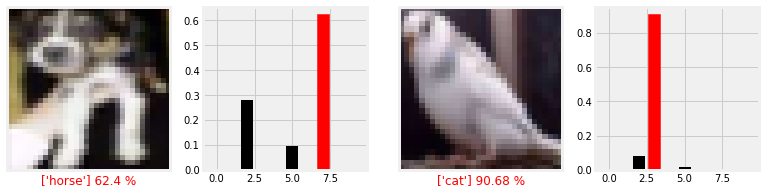

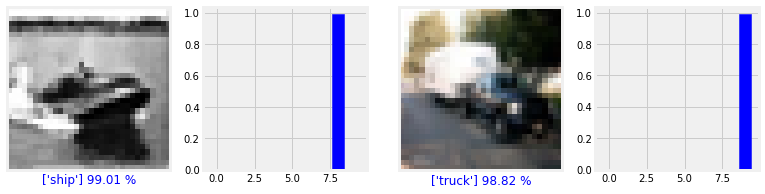

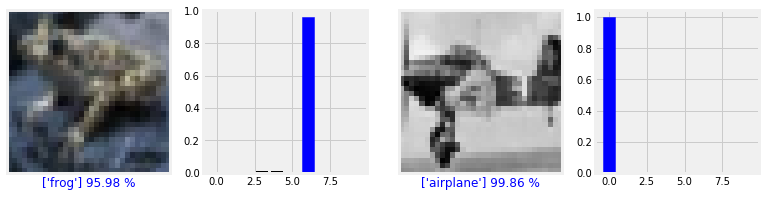

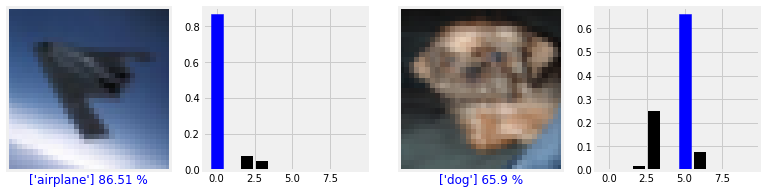

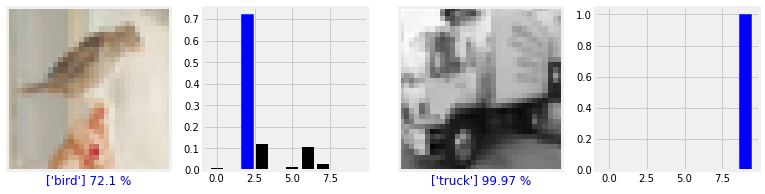

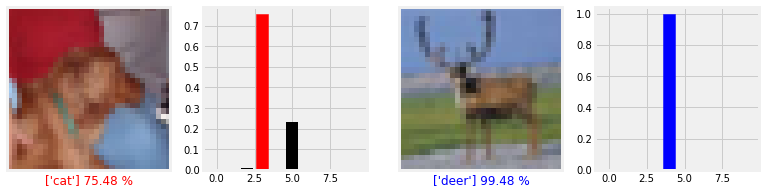

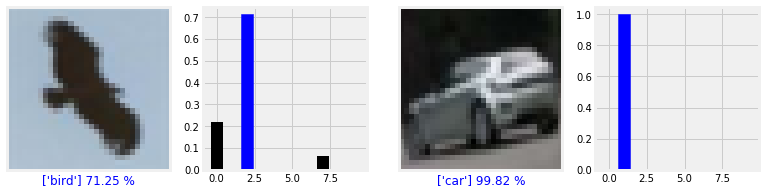

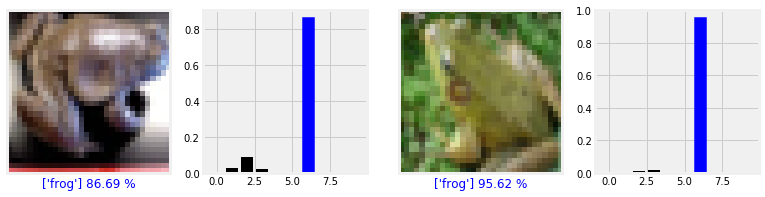

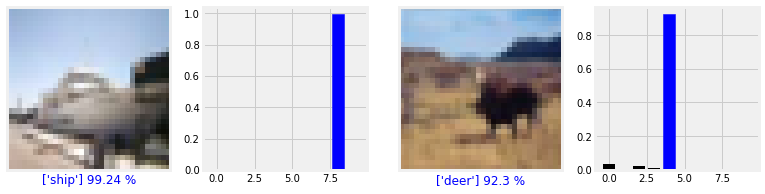

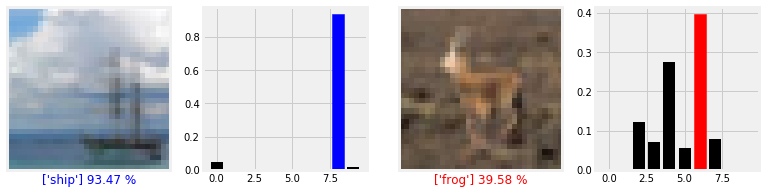

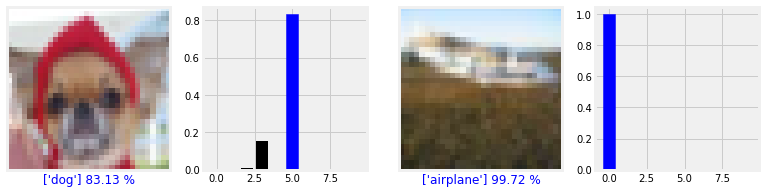

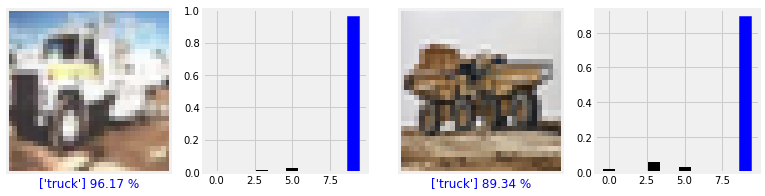

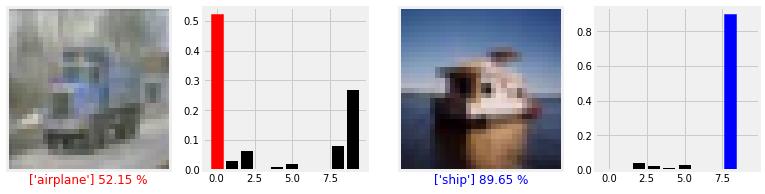

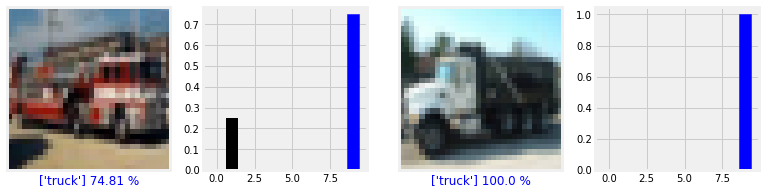

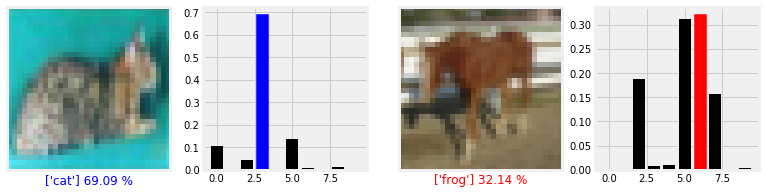

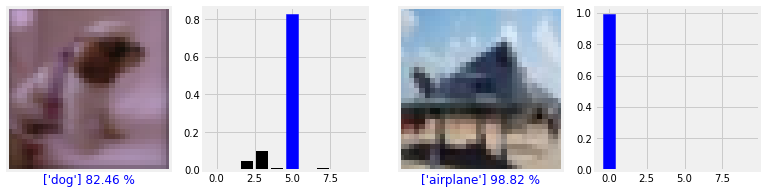

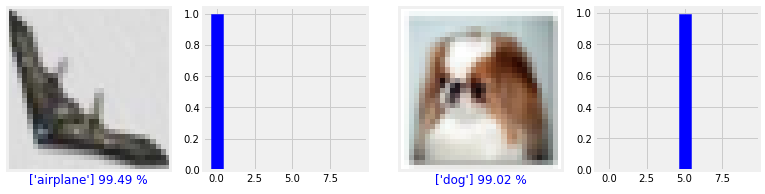

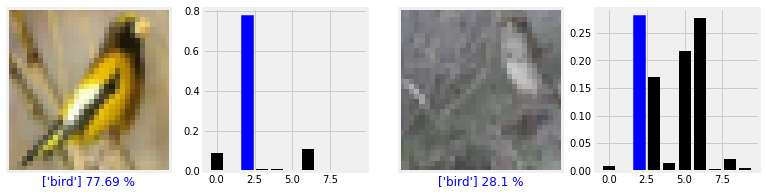

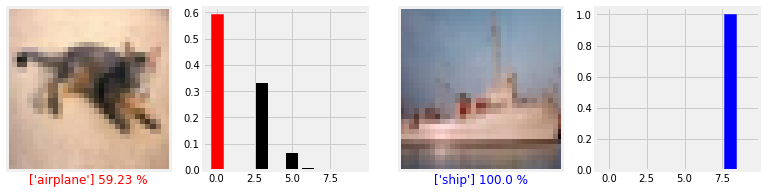

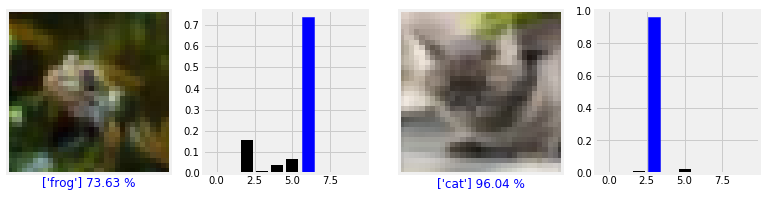

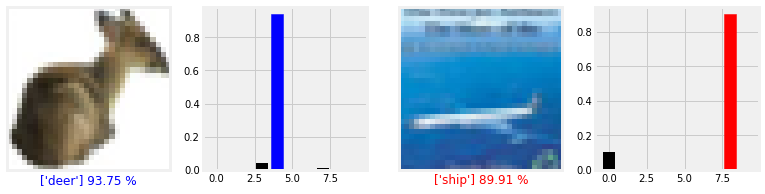

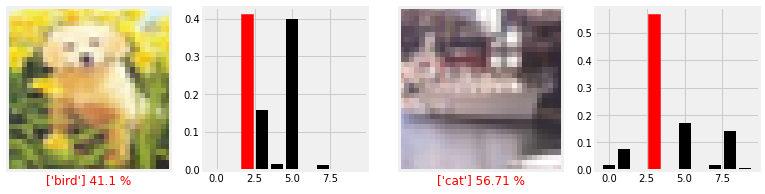

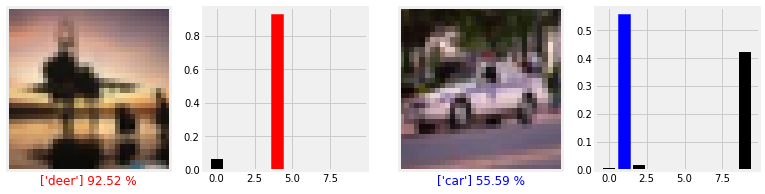

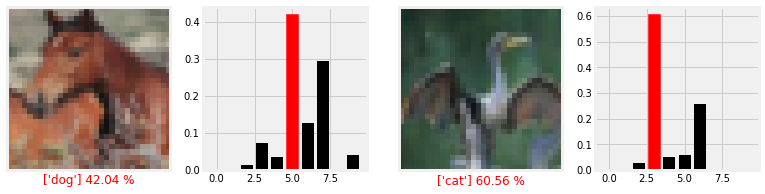

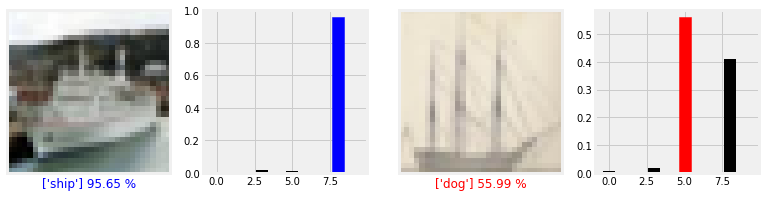

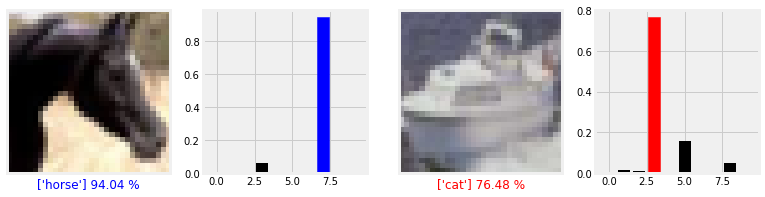

In [125]:
j=0
for i in range(100):
    plt.figure(figsize=(12,3))
    plt.subplot(1,4,1)
    plottingphoto(j)
    plt.subplot(1,4,2)
    plottingbargraph(j)
    j=j+1
    plt.subplot(1,4,3)
    plottingphoto(j)
    plt.subplot(1,4,4)
    plottingbargraph(j)
    j=j+1
    plt.show()